<a href="https://colab.research.google.com/github/kelvinnjunge/Prep-week-4/blob/main/Moringa_Data_Science_Prep_W4_Independent_Project_2019_06_KELVIN_NJUNGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#      Electric Car-Sharing Data Analysis in April 2018 (9 days period)

#Data Preview (Understanding)

In [ ]:
#Importing the necessary libraries
#pandas library
import pandas as pd

#numpy library
import numpy as np

In [ ]:
#Preview the csv file
df = pd.read_csv('/content/Autolib_dataset (2).csv')
df.head(10)

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23
5,8 Boulevard Voltaire,0,0,0,0,0,nonexistent,Paris,NaN,paris-voltaire-8,STATION,"48.8657658, 2.3664376",75011,Paris/Voltaire/8,operational,NaN,4,station,ok,nonexistent,2018,4,6,7,2
6,37 rue Leblanc,0,0,0,0,0,nonexistent,Paris,"Station en parking (niv -1), accÃ¨s 37 rue Leb...",paris-citroencevennes-parking,PARKING,"48.83874, 2.27641",75015,Paris/CitroÃ«n CÃ©vennes/Parking,broken,NaN,0,station,closed,nonexistent,2018,4,8,18,20
7,17 Rue des Luaps ProlongÃ©e,3,3,1,0,0,nonexistent,Nanterre,NaN,nanterre-luaps-17,STATION,"48.88069, 2.21063",92000,Nanterre/Luaps/17,operational,NaN,0,station,ok,nonexistent,2018,4,4,22,13
8,34 avenue Jean Moulin,1,1,0,0,0,nonexistent,Paris,NaN,paris-jeanmoulin-34,STATION,"48.8266807, 2.3237355",75014,Paris/Jean Moulin/34,operational,NaN,4,station,ok,nonexistent,2018,4,2,22,58
9,41 boulevard de Rochechouart,6,6,0,0,0,nonexistent,Paris,NaN,paris-anvers-parking,PARKING,"48.88267, 2.34405",75009,Paris/Anvers/Parking,operational,NaN,0,station,ok,nonexistent,2018,4,4,15,2


## View our data info

In [ ]:
# Getting information from our dataset.
df.info()

##Validity of the data


In [ ]:

# Describing our data allows us to get a general overview of how the data is.
df.describe()

,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Postal code,Slots,year,month,day,hour,minute
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.0,5000.000000,5000.000000,5000.000000
mean,2.333600,2.333600,0.059600,0.123000,0.253400,82634.878400,1.932400,2018.0,4.0,4.941600,11.509200,29.270000
std,2.035274,2.035274,0.246698,0.356506,0.546304,8835.865721,1.905402,0.0,0.0,2.597063,6.893549,17.231741
min,0.000000,0.000000,0.000000,0.000000,0.000000,75001.000000,0.000000,2018.0,4.0,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,75012.000000,0.000000,2018.0,4.0,3.000000,6.000000,14.000000
50%,2.000000,2.000000,0.000000,0.000000,0.000000,75019.000000,1.000000,2018.0,4.0,5.000000,11.000000,29.000000
75%,4.000000,4.000000,0.000000,0.000000,0.000000,92320.000000,3.000000,2018.0,4.0,7.000000,18.000000,44.000000
max,7.000000,7.000000,2.000000,3.000000,2.000000,95880.000000,7.000000,2018.0,4.0,9.000000,23.000000,59.000000


In [ ]:
#dropping irrelevant data
df.drop(['Cars','Displayed comment', 'Geo point', 'Scheduled at', 'Status', 'Subscription status'], axis=1, inplace=True)
df.head(2)

,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Postal code,Public name,Rental status,Slots,Station type,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,75015,Paris/Suffren/2,operational,2,station,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,operational,0,station,2018,4,6,7,24


## Accuracy

In [ ]:
# Procedure 1:
# Data Cleaning Action: Checking for null values in our dataset.
# Explanation: This is to allows us to determin the columns that have null values.
# 
df_null = df.isnull().any()
df_null

Address               False
Bluecar counter       False
Utilib counter        False
Utilib 1.4 counter    False
Charge Slots          False
Charging Status       False
City                  False
ID                    False
Kind                  False
Postal code           False
Public name           False
Rental status         False
Slots                 False
Station type          False
year                  False
month                 False
day                   False
hour                  False
minute                False
dtype: bool

## Completeness

In [ ]:
# Procedure 1:
# Data Cleaning Action: Check for duplicate values.
# Explanation: This is to allow us determine data that is duplicated.
#
df_dup = df.duplicated().sum()
df_dup

0

## Consistency

In [ ]:
# Procedure 1:
# Data Cleaning Action: Dropping null values if they exist.
# Explanation: This is to allow us determine data that is duplicated.
#
df_new = df.dropna(how="all")
df_new.head()

,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Postal code,Public name,Rental status,Slots,Station type,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,75015,Paris/Suffren/2,operational,2,station,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,operational,0,station,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,75017,Paris/Porte de Champerret/6,operational,3,station,2018,4,8,17,23


# Uniformity of the data

In [ ]:
# Procedure 1:
# Data Cleaning Action: Converting column names to lowercase characters.
# Explanation: This is to allow for a uniform columns in the dataframe.
#
df.columns = df.columns.str.rstrip().str.lower()
df.head(3)

,address,bluecar counter,utilib counter,utilib 1.4 counter,charge slots,charging status,city,id,kind,postal code,public name,rental status,slots,station type,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,75015,Paris/Suffren/2,operational,2,station,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,operational,0,station,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,2018,4,3,20,14


In [ ]:
df.columns = df.columns.str.replace(" ", "_", regex=True)
df.head(2)

,address,bluecar_counter,utilib_counter,utilib_1.4_counter,charge_slots,charging_status,city,id,kind,postal_code,public_name,rental_status,slots,station_type,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,75015,Paris/Suffren/2,operational,2,station,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,75014,Paris/Raymond Losserand/145,operational,0,station,2018,4,6,7,24


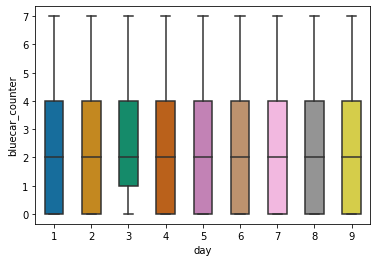

In [ ]:
#visual inspection of the spread of the data for any outliers
import matplotlib.pyplot as plt 
% matplotlib inline 
import seaborn as sns
sns.boxplot(y='bluecar_counter', x='day', data=df, width=0.5, palette="colorblind")

## Exporting our clean csv file

In [ ]:
df.to_csv("autolib_clean.csv")

## Answering Questions
 



Blue cars

In [ ]:
# Challenge 1
# Finding the most popular hour for returning cars?
#
df = pd.read_csv("/content/autolib_clean.csv")
df1 = df[["bluecar_counter","day", "hour", "minute"]]
df2= df1[df1["bluecar_counter"] == 0]
df2['hour'].max()

23

In [ ]:
# Challenge 2
#What station is the most popular?
#
df_pop= df.groupby(['public_name'])['bluecar_counter'].max().sort_values(ascending=False)

df_pop.head(1)

public_name
Sceaux/Franklin Roosevelt/60    7
Name: bluecar_counter, dtype: int64

In [ ]:
# Challenge 3
# What postal code is the most popular for picking up Blue cars?
df_station = df[['address', 'postal_code','bluecar_counter']]
df_postal = df_station.sort_values('bluecar_counter', ascending=False)
df_postal.head(1)

,address,postal_code,bluecar_counter
1985,99 rue Charles-de-Gaulle,91330,7


In [ ]:
# Challenge 4
# Does the most popular station belong to that postal code?
df_station = df[['address','postal_code','bluecar_counter']]
df_postal = df_station.sort_values('bluecar_counter', ascending=False)
df_postal.head(1)

,address,postal_code,bluecar_counter
1985,99 rue Charles-de-Gaulle,91330,7


 Utilib 1.4



In [ ]:
# Challenge 1
# Finding the most popular hour for returning cars?
#
df = pd.read_csv("/content/autolib_clean.csv")
df1 = df[["utilib_1.4_counter","day", "hour", "minute"]]
df2= df1[df1["utilib_1.4_counter"] == 0]
df2['hour'].max()


23

In [ ]:
# Challenge 2
#What station is the most popular?
#
df_pop= df.groupby(['public_name'])['utilib_1.4_counter'].max().sort_values(ascending=False)

df_pop.head(1)

public_name
SÃ¨vres/Grande Rue/123    3
Name: utilib_1.4_counter, dtype: int64

In [ ]:
# Challenge 3
# What postal code is the most popular for picking up Blue cars?
df_station = df[['public_name', 'postal_code','utilib_1.4_counter']]
df_postal = df_station.sort_values('utilib_1.4_counter', ascending=False)
df_postal.head(1)

,public_name,postal_code,utilib_1.4_counter
2731,SÃ¨vres/Grande Rue/123,92310,3


In [ ]:
# Challenge 4
# Does the most popular station belong to that postal code?
df_station = df[['public_name','postal_code','utilib_1.4_counter']]
df_postal = df_station.sort_values('utilib_1.4_counter', ascending=False)
df_postal.head(1)

,public_name,postal_code,utilib_1.4_counter
2731,SÃ¨vres/Grande Rue/123,92310,3


# utilib_counter


In [ ]:
# Challenge 1
# Finding the most popular hour for returning cars?
#
df = pd.read_csv("/content/autolib_clean.csv")
df1 = df[["utilib_counter","day", "hour", "minute"]]
df2= df1[df1["utilib_counter"] == 0]
df2['hour'].max()

23

In [ ]:
# Challenge 2
#What station is the most popular?
#
df_pop= df.groupby(['public_name'])['utilib_counter'].max().sort_values(ascending=False)
df_pop.head(1)


public_name
Paris/Suffren/161    2
Name: utilib_counter, dtype: int64

In [ ]:
# Challenge 3
# What postal code is the most popular for picking up Blue cars?
df_station = df[['public_name', 'postal_code','utilib_counter']]
df_postal = df_station.sort_values('utilib_counter', ascending=False)
df_postal.head(1)

,public_name,postal_code,utilib_counter
3329,Paris/Chateaubriand/19,75008,2


In [ ]:
# Challenge 4
# Does the most popular station belong to that postal code?
df_station = df[['public_name','postal_code','utilib_counter']]
df_postal = df_station.sort_values('utilib_counter', ascending=False)
df_postal.head(1)

,public_name,postal_code,utilib_counter
3329,Paris/Chateaubriand/19,75008,2
